### Завантаження та огляд файлів

In [22]:
import pandas as pd
import numpy as np
TEST_SIZE = 0.2

data = pd.DataFrame(pd.read_csv("heart_2022_no_nans.csv"))

print(data.describe(include="all"))

data.head()

# Унікальні значення категоріальних стовпців
for col in data:
    if data.dtypes[col] == object:
        print(f"{col}: {data[col].unique()}")

             State     Sex GeneralHealth  PhysicalHealthDays  \
count       246022  246022        246022       246022.000000   
unique          54       2             5                 NaN   
top     Washington  Female     Very good                 NaN   
freq         15000  127811         86999                 NaN   
mean           NaN     NaN           NaN            4.119026   
std            NaN     NaN           NaN            8.405844   
min            NaN     NaN           NaN            0.000000   
25%            NaN     NaN           NaN            0.000000   
50%            NaN     NaN           NaN            0.000000   
75%            NaN     NaN           NaN            3.000000   
max            NaN     NaN           NaN           30.000000   

        MentalHealthDays                                    LastCheckupTime  \
count      246022.000000                                             246022   
unique               NaN                                                 

### Конвертація значень

In [23]:
data = data.drop(columns=["State", "RaceEthnicityCategory"])
data = data.replace("Female", "0")
data = data.replace("Male", "1")
data["AgeCategory"] = data["AgeCategory"].str[4:6]

data["GeneralHealth"] = data["GeneralHealth"].replace({"Poor":"0", "Fair":"1", "Good":"2", "Very good":"3", "Excellent":"4"})
data["LastCheckupTime"] = data["LastCheckupTime"].replace({"Within past year (anytime less than 12 months ago)":"0",
                                                           "Within past 2 years (1 year but less than 2 years ago)": "1",
                                                          "Within past 5 years (2 years but less than 5 years ago)": "2",
                                                          "5 or more years ago": "3"})

data["RemovedTeeth"] = data["RemovedTeeth"].replace({"All": "3", 
                                                     "6 or more, but not all": "2",
                                                     "1 to 5": "1",
                                                     "None of them": "0"
                                                    })


data["HadDiabetes"] = data["HadDiabetes"].replace({"No":"0",
                                                  "No, pre-diabetes or borderline diabetes": "1",
                                                  "Yes, but only during pregnancy (female)": "2",
                                                  "Yes": "3"})

data["SmokerStatus"] = data["SmokerStatus"].replace({"Never smoked": "0",
                                                    "Former smoker": "1",
                                                    "Current smoker - now smokes some days": "2",
                                                    "Current smoker - now smokes every day": "3"})

data["ECigaretteUsage"] = data["ECigaretteUsage"].replace({"Never used e-cigarettes in my entire life": "0",
                                                          "Not at all (right now)": "1",
                                                          "Use them some days": "2",
                                                          "Use them every day":"3"})

data["TetanusLast10Tdap"] = data["TetanusLast10Tdap"].replace({"No, did not receive any tetanus shot in the past 10 years": "0",
                                                              "Yes, received tetanus shot but not sure what type": "1",
                                                              "Yes, received tetanus shot, but not Tdap": "2",
                                                              "Yes, received Tdap": "3"})
data["CovidPos"] = data["CovidPos"].replace({"No":"0", 
                                             "Tested positive using home test without a health professional": "1",
                                             "Yes": "2"})

data = data.replace({"No":"0",
                     "Yes": "1"})

data.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,3,4.0,0.0,0,1,9.0,0,0,0,...,1.60,71.67,27.99,0,0,1,1,3,0,0
1,1,3,0.0,0.0,0,1,6.0,0,0,0,...,1.78,95.25,30.13,0,0,1,1,1,0,0
2,1,3,0.0,0.0,0,0,8.0,2,0,0,...,1.85,108.86,31.66,1,0,0,1,0,0,2
3,0,1,5.0,0.0,0,1,9.0,0,0,0,...,1.70,90.72,31.32,0,0,1,1,0,0,2
4,0,2,3.0,15.0,0,1,5.0,1,0,0,...,1.55,79.38,33.07,0,0,1,1,0,0,0


### Перевірка відсутніх значень

In [24]:
data.isnull().sum()

Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
AlcoholDrinkers              0
HIVTesti

### Попередній аналіз даних (EDA)

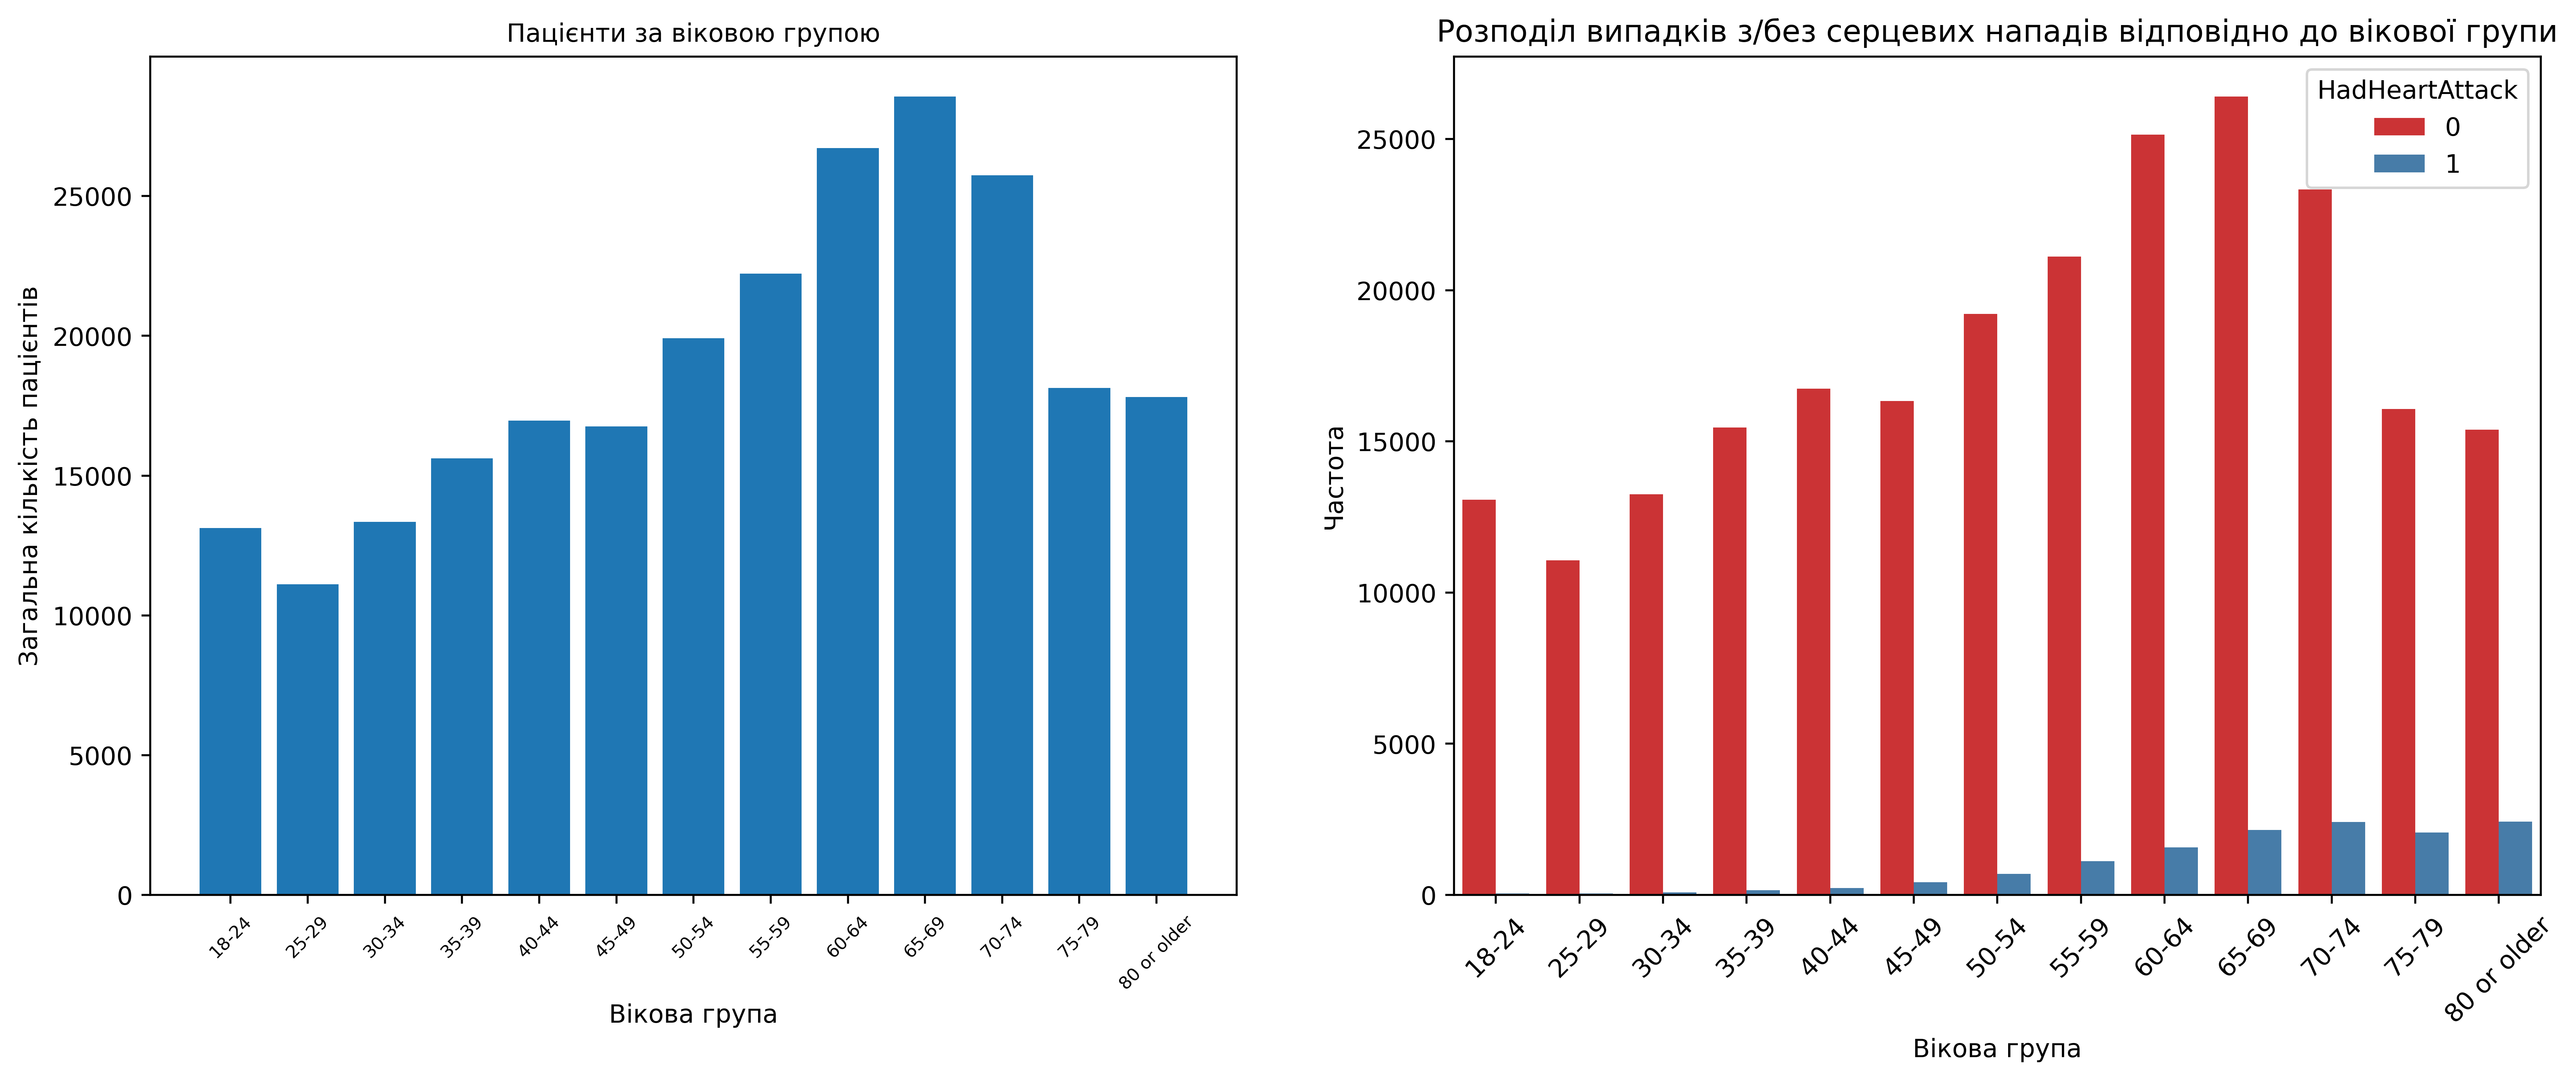

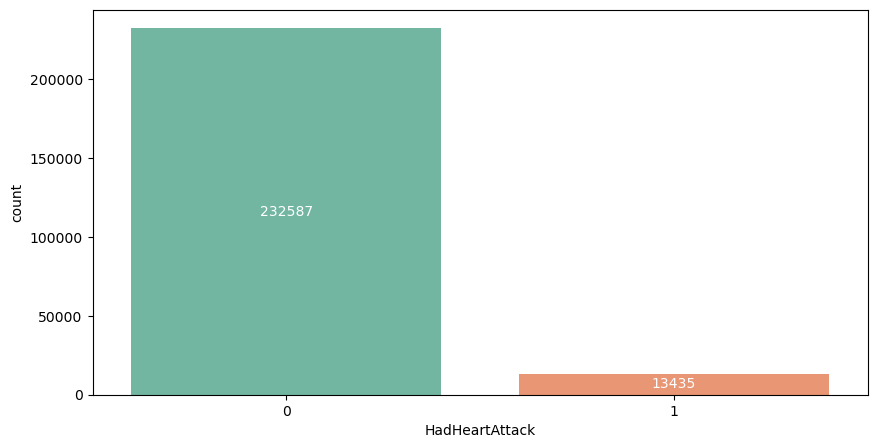

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

age_category = data.groupby(["AgeCategory"])

group_by_age = {}
for age, group in age_category:
    group_by_age[age] = group["AgeCategory"].count()

x_axis = np.arange(0, len(group_by_age.keys()) )
ageCategories = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']

fig, axes = plt.subplots(1, 2, figsize=(17, 6), dpi=500)

age_groups_ax = plt.subplot(1, 2, 1)
bars = plt.bar(x_axis, list(group_by_age.values()))

age_groups_ax.set_xticks(x_axis)
age_groups_ax.set_xticklabels(ageCategories, size=7)

age_groups_ax.set_title("Пацієнти за віковою групою", size=10)
age_groups_ax.set_xlabel("Вікова група")
age_groups_ax.set_ylabel("Загальна кількість пацієнтів")
plt.xticks(rotation=45)

heart_disease_ax = plt.subplot(1,2,2 )     
order = pd.unique(data.AgeCategory.values)
order.sort()
bars = sns.countplot(data=data, x='AgeCategory', hue='HadHeartAttack', palette='Set1', order=order)
plt.title("Розподіл випадків з/без серцевих нападів відповідно до вікової групи")
plt.xlabel('Вікова група')
heart_disease_ax.set_xticks(x_axis)
heart_disease_ax.set_xticklabels(ageCategories)
plt.ylabel('Частота')
plt.xticks(rotation=45)

plt.show()

plt.figure(figsize = (10,5))
ax=sns.countplot(data=data , x = 'HadHeartAttack', hue='HadHeartAttack', legend=False,  palette="Set2")
for container in ax.containers:
    ax.bar_label(container, label_type='center', rotation=0, color='white')
plt.show()


**Дані є незбалансованими**: приблизно 94.5% записів відповідають відсутності серцевого нападу і лише 5.5% - наявності серцевого нападу. Дизбаланс класів є досить великим, також важливо помітити, що кількість позитивних записів невелика - близько 13 тис.

## Підготовка до тренування моделей

In [26]:
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
data1 = data.copy(deep=True)

col = list(data.columns)
categorical_features = []
numerical_features = []

for i in data1.columns:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        data1[i] = le.fit_transform(data1[i])
        categorical_features.append(i)

In [27]:
X = data1.drop(['HadHeartAttack'], axis=1)
y = data1['HadHeartAttack']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_initial_train, X_initial_test, y_initial_train, y_initial_test = train_test_split(X_scaled, y, test_size=TEST_SIZE, random_state=0)

Одразу масштабуємо та розділяємо дані на набори для тренування та тестування. Балансування класів на всій множині даних призводить до витоку даних та перенавчанню моделі (особливо дерева рішень), також це завадить корректні оцінці моделі на початкових даних. Балансування класів буде відбуватись на тренувальному наборі, тестування моделей - на наборі для тестування.

### Функція валідації моделі

Модель випробовується на початкових даних. Працює як для моделі логістичної регресії, так і для моделі дерева рішень.

In [28]:
all_logreg_logs = pd.DataFrame()
all_dtree_logs = pd.DataFrame()

def validate_model(model, balancing_method_name: str):        
    global all_logreg_logs, all_dtree_logs, X_initial_test, y_initial_test
    
    if isinstance(model, LogisticRegression):
        weights = model.coef_[0]
        intercept = model.intercept_[0]
        
        logits = np.dot(X_initial_test, weights) + intercept
        probabilities = 1 / (1 + np.exp(-logits))
        y_pred_initial = (probabilities >= 0.5).astype(int)
    else:
        probabilities = model.predict_proba(X_initial_test)[:, 1]
        y_pred_initial = model.predict(X_initial_test)
    
    accuracy_initial = accuracy_score(y_initial_test, y_pred_initial)
    precision_initial = precision_score(y_initial_test, y_pred_initial)
    recall_initial = recall_score(y_initial_test, y_pred_initial)
    f1_initial = f1_score(y_initial_test, y_pred_initial)
    roc_auc_initial = roc_auc_score(y_initial_test, probabilities)
    initial_validation_log = pd.DataFrame(data=[accuracy_initial,
                                                precision_initial,
                                                recall_initial,
                                                f1_initial,
                                                roc_auc_initial],
                                          index=['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC'],
                                          columns=[f"{balancing_method_name}"])
    
    if isinstance(model, LogisticRegression):
        all_logreg_logs = pd.concat([all_logreg_logs, initial_validation_log], axis=1)
        print("\nLogistic Regression")
        print(all_logreg_logs.transpose())
    else:
        all_dtree_logs = pd.concat([all_dtree_logs, initial_validation_log], axis=1)
        print("\nDtree models")
        print(all_dtree_logs.transpose())

### Функції тренування моделей

Відбувається почергове тренування спочатку моделі логістичної регресії, а після й моделі дерева рішень. Після ввідбувається валідація кожної моделі та заноситься у загальний лог по всім методам та моделям.

In [29]:
def train_models(X_train_balanced, y_train_balanced, balancing_method_name: str):
    
    logreg_model = train_regression_model(X_train_balanced, y_train_balanced)
    dtree_model = train_dtree_model(X_train_balanced, y_train_balanced)

    print("\n\nComparison After Validation")
    validate_model(logreg_model, "Logreg_" + balancing_method_name)
    validate_model(dtree_model, "Dtree_" + balancing_method_name)

In [30]:
def train_regression_model(X_train_balanced, y_train_balanced):
    logreg = LogisticRegression(solver="liblinear", penalty="l2", C=0.00001, max_iter=10000)
    logreg.fit(X_train_balanced, y_train_balanced)
    
    return logreg

In [31]:
def train_dtree_model(X_train_balanced, y_train_balanced):
    dtree = DecisionTreeClassifier(random_state=0)
    dtree.fit(X_train_balanced, y_train_balanced)

    return dtree

In [32]:
def show_stats(y_balanced, balanced_method_name):
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x=y_balanced, hue=y_balanced, palette="Set2")
    for container in ax.containers:
        ax.bar_label(container, label_type='center', rotation=0, color='white')
    plt.title(f"Розподіл після {balanced_method_name}", size=16)
    plt.show()

## Тренування моделей

### Тренування без балансування даних

In [33]:
train_models(X_initial_train, y_initial_train, "without_balancing")



Comparison After Validation

Logistic Regression
                          Accuracy  Precision    Recall  F1-score       AUC
Logreg_without_balancing  0.946957   0.538106  0.339898  0.416629  0.889924

Dtree models
                         Accuracy  Precision    Recall  F1-score       AUC
Dtree_without_balancing   0.91259   0.257694  0.302334  0.278235  0.625469


Модель має високий показник Accuracy, 94%. Але в той же час низькі Precision та Recall. Тільки кожне друге передбачення буде корректним. І лише третина реальних серцевих нападів буде передбачено. Прямо зараз модель робить менше передбачень, віддаючи перевагу точності передбачень, ніж передбаченню усіх реальних випадків серцевих нападів.

І, очевидно, модель гарно передбачає відсутність серцевих нападів, про що свідчить високий Accuracy, значення якого якраз відповідає частці даних, де серцеві напади відсутні. 

Інакше кажучи модель має велику кількість хибнопозитивних та хибнонегативних результатів. Цю проблему можна спробувати вирішити за домопогою балансування класів.

## Балансування класів

Для балансування класів я обрав комбінацію методів Random Oversample та One Sided Selection, який виявив себе найкраще у ході порівнянь методів балансування в блокнотах Oversampling_Comrapison, Undersampling_Comparison та Combined_Comparison.

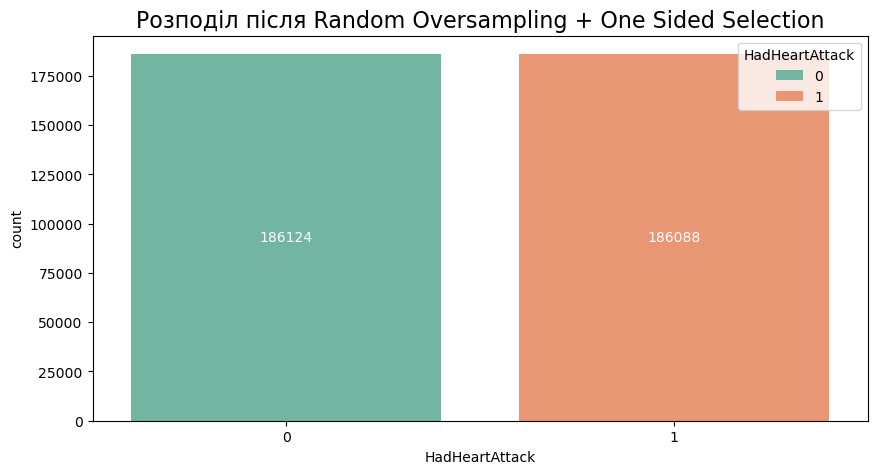

In [34]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import OneSidedSelection

oversampler = RandomOverSampler(sampling_strategy='minority')
X_ROS, y_ROS = oversampler.fit_resample(X_initial_train, y_initial_train)

oss = OneSidedSelection()
X_ROSS, y_ROSS = oss.fit_resample(X_ROS, y_ROS)

show_stats(y_ROSS, "Random Oversampling + One Sided Selection")

In [35]:
train_models(X_ROSS, y_ROSS, "data_balanced")



Comparison After Validation

Logistic Regression
                          Accuracy  Precision    Recall  F1-score       AUC
Logreg_without_balancing  0.946957   0.538106  0.339898  0.416629  0.889924
Logreg_data_balanced      0.755757   0.167955  0.855580  0.280790  0.891820

Dtree models
                         Accuracy  Precision    Recall  F1-score       AUC
Dtree_without_balancing  0.912590   0.257694  0.302334  0.278235  0.625469
Dtree_data_balanced      0.920354   0.274607  0.261488  0.267887  0.610362


Можна бачити що в випадку логістичної регресії сильно впав показник Accuracy та Precision, але вдвічі виріс показник Recall. Це свідчить про те, що модель стала робити більше передбачень в цілому, передбачаючи 85% усіх реальних випадків серцевих нападів. Хоча передбачення в середньому стали менш вірними.

У випадку з деревом рішень можемо бачити незначне збільшення Accuracy та Precision, хоча це не дуже гарний результат, так як він відбувається за рахунок зниження показників Recall та AUC, що свідчить про зменшення загальної точності.

## Тюнинг гіперпараметрів

Для тюнингу гіперпараметрів я застосував модуль GridSearchCV бібліотеки scikit-learn. Тюнинг окремо проведено для логістичної регресії та дерева рішень.

### Логістична регресія

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga']
}

logreg = LogisticRegression(penalty='l2', max_iter=10000)

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring=make_scorer(f1_score), n_jobs=-1)
grid_search.fit(X_ROSS, y_ROSS)

best_params = grid_search.best_params_
print("Найкращі параметри:", best_params)

Найкращі параметри: {'C': 0.0001, 'solver': 'liblinear'}


In [37]:
logreg_best = grid_search.best_estimator_
logreg_best.fit(X_ROSS, y_ROSS)

validate_model(logreg_best, "Logreg_balanced_tuned")


Logistic Regression
                          Accuracy  Precision    Recall  F1-score       AUC
Logreg_without_balancing  0.946957   0.538106  0.339898  0.416629  0.889924
Logreg_data_balanced      0.755757   0.167955  0.855580  0.280790  0.891820
Logreg_balanced_tuned     0.821746   0.211503  0.805981  0.335077  0.895785


Після тюнингу гіперпараметрів логістичної регресії можна бачити збільшення показника AUC на 0.05 пункта, що свідчить про поліпшення загальної точності моделі.

Також варто відмітити зріст Accuracy на 7 пунктів та Precision на 5 пунктів, що є досить гарним результатом у обмін на зниженням Recall на 5 пунктів.

### Дерево рішень

In [38]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dtree = DecisionTreeClassifier(random_state=0)

grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring=make_scorer(f1_score), n_jobs=-1)
grid_search.fit(X_ROSS, y_ROSS)

best_params = grid_search.best_params_
print("Найкращі параметри:", best_params)

Найкращі параметри: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [39]:
dtree_best = grid_search.best_estimator_
dtree_best.fit(X_ROSS, y_ROSS)

validate_model(dtree_best, "Dtree_balanced_tuned")


Dtree models
                         Accuracy  Precision    Recall  F1-score       AUC
Dtree_without_balancing  0.912590   0.257694  0.302334  0.278235  0.625469
Dtree_data_balanced      0.920354   0.274607  0.261488  0.267887  0.610362
Dtree_balanced_tuned     0.803943   0.190164  0.772794  0.305221  0.852498


Для дерева рішень можна спостерігати значення збільшення загальної точності моделі через збільшення показника AUC на цілих 24 пункти. Також вдвічі зріс показник Recall, хоч і за рахунок зменшення Accuracy та Precision. 

Модель стала в середньому менш точною, але вона тепер передбачає набагто більше випадків реальних серцевих нападів.

In [44]:
all_logreg_logs.transpose()

,Accuracy,Precision,Recall,F1-score,AUC
Logreg_without_balancing,0.946957,0.538106,0.339898,0.416629,0.889924
Logreg_data_balanced,0.755757,0.167955,0.855580,0.280790,0.891820
Logreg_balanced_tuned,0.821746,0.211503,0.805981,0.335077,0.895785


In [45]:
all_dtree_logs.transpose()

,Accuracy,Precision,Recall,F1-score,AUC
Dtree_without_balancing,0.912590,0.257694,0.302334,0.278235,0.625469
Dtree_data_balanced,0.920354,0.274607,0.261488,0.267887,0.610362
Dtree_balanced_tuned,0.803943,0.190164,0.772794,0.305221,0.852498


## Оцінка параметрів за допомогою SHAP

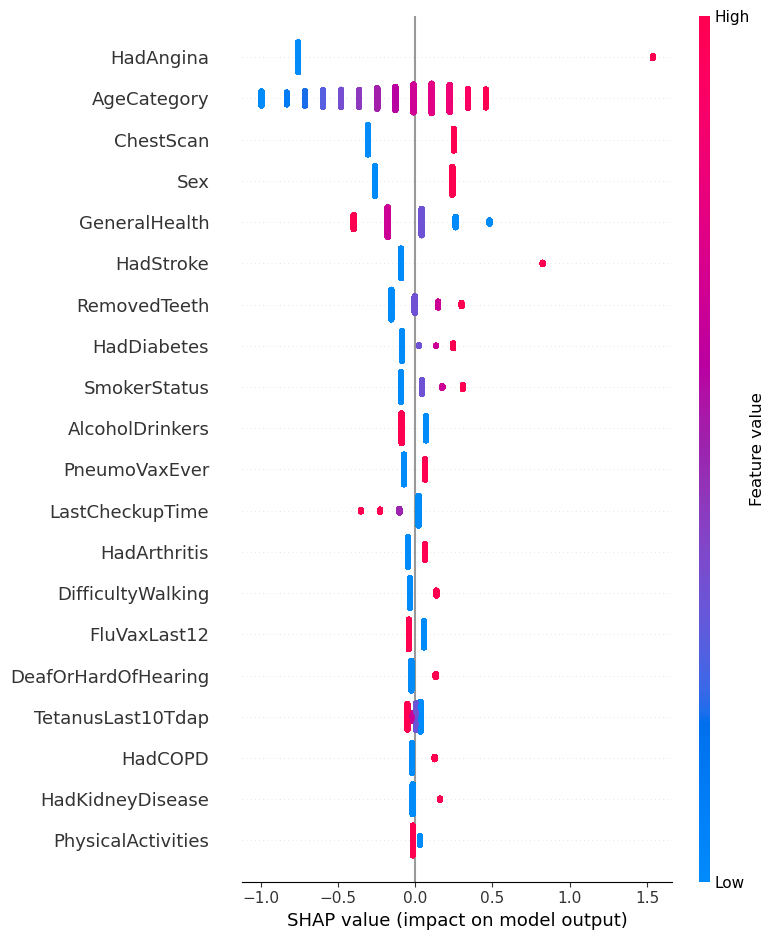

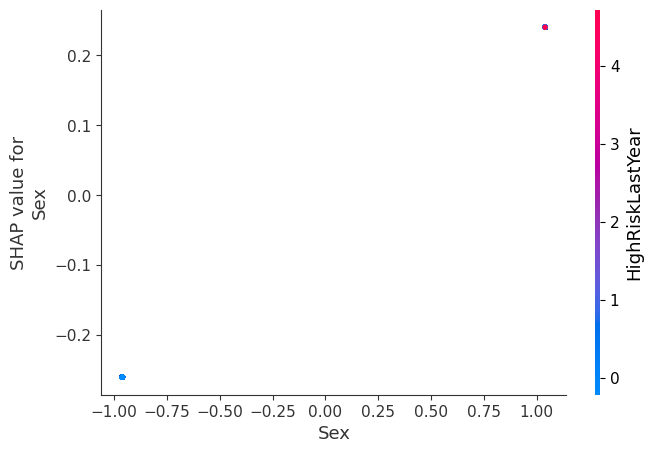

In [54]:
import shap

explainer = shap.LinearExplainer(logreg_best, X_ROSS)
shap_values = explainer(X_initial_test)

shap.summary_plot(shap_values, X_initial_test, feature_names=X.columns)

shap.dependence_plot(0, shap_values.values, X_initial_test, feature_names=X.columns)

# Створення таблиці з значеннями SHAP для кожної ознаки
shap_values_df = pd.DataFrame(shap_values.values, columns=X.columns)

shap_summary = shap_values_df.abs().mean().sort_values(ascending=False).reset_index()
shap_summary.columns = ['Feature', 'Mean SHAP Value']

# Збереження таблиці в CSV файл
shap_summary.to_csv('shap_summary.csv', index=False)

Серед 5 головних факторів: захворювання ангіною, вік, наявність скану грудей, стать, загальний стан здоров'я.
За ними у топ 10 входять: пережитий інсульт, кількість видалених зубів, захворювання діабетом, паління, вживання алкоголю.

Виходячи з оцінки SHAP найбільший вплив на ризик серцевого нападу має фактор захворювання ангіною. 

Також можна бачити що великий вплив має вік, він значно збільшується з роками.

Також, що цікаво, модель оцінила, що чоловіча стать пов'язана з більшим ризиком серцевого нападу, а наявність скану грудей пов'язана зі значним зменшенням ризику серцевого нападу.